problem_size  processes
0.25          4             1.794298
              8             1.554635
              16            1.497075
              24            1.458633
              32            1.576714
              64            1.528036
              96            1.457933
              128           1.491831
0.50          4             6.182542
              8             3.421598
              16            3.110757
              24            3.000642
              32            3.007688
              64            2.949631
              96            2.887723
              128           2.901897
1.00          4            14.098894
              8             8.743154
              16            6.626509
              24            5.977541
              32            5.887534
              64            5.816194
              96            5.820496
              128           5.775436
Name: time, dtype: float64


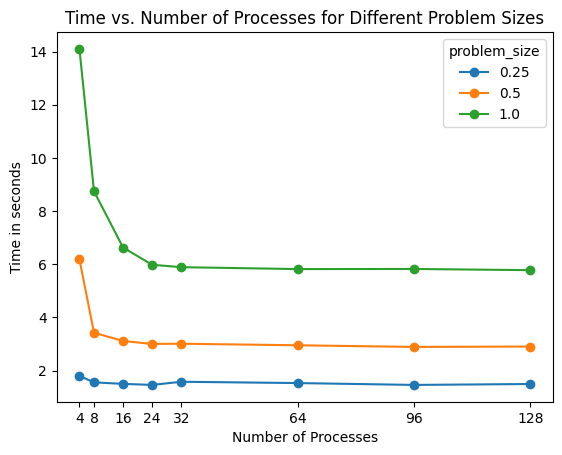

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('/Users/francescolaiti/Downloads/performance_benchmarks.csv')

# Group the data by problem size and number of processes
grouped_data = data.groupby(['problem_size', 'processes'])


# Take the minimum time for each configuration
min_times = grouped_data['time'].min()
print(min_times)

# Reshape the data for plotting
plot_data = min_times.unstack(level=0)

# Plot the data
plot_data.plot.line(marker='o')

# Set the x-tick locations and labels
plt.xticks(min_times.index.levels[1], min_times.index.levels[1])

# Add axis labels and a title
plt.xlabel('Number of Processes')
plt.ylabel('Time in seconds')
plt.title('Time vs. Number of Processes for Different Problem Sizes')

# Show the plot
plt.show()


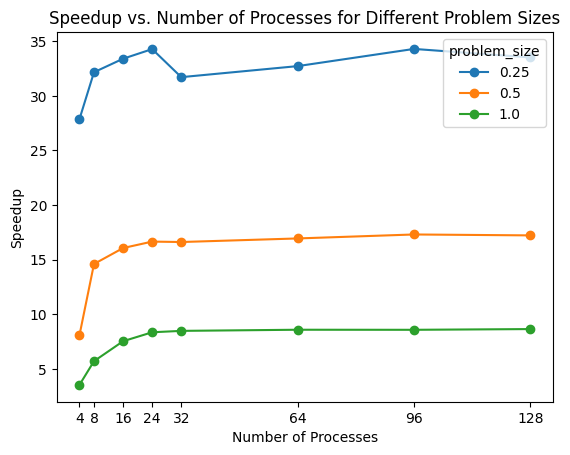

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('/Users/francescolaiti/Downloads/performance_benchmarks.csv')

# Calculate the serial time for each problem size
serial_times = 50.0

# Group the data by problem size and number of processes
grouped_data = data.groupby(['problem_size', 'processes'])

# Take the minimum time for each configuration
min_times = grouped_data['time'].min()

# Calculate the speedup for each configuration
speedup = serial_times / min_times

# Reshape the data for plotting
plot_data = speedup.unstack(level=0)

# Plot the data
plot_data.plot.line(marker='o')

# Set the x-tick locations and labels
plt.xticks(min_times.index.levels[1], min_times.index.levels[1])

# Add axis labels and a title
plt.xlabel('Number of Processes')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Processes for Different Problem Sizes')

# Show the plot
plt.show()

problem_size  processes
0.25          4            6.130531
              8            3.537808
              16           1.836915
              24           1.256885
              32           0.872067
              64           0.449924
              96           0.314372
              128          0.230422
0.50          4            1.779203
              8            1.607436
              16           0.884029
              24           0.610980
              32           0.457162
              64           0.233080
              96           0.158718
              128          0.118457
1.00          4            0.780203
              8            0.629064
              16           0.415000
              24           0.306704
              32           0.233544
              64           0.118204
              96           0.078745
              128          0.059519
dtype: float64


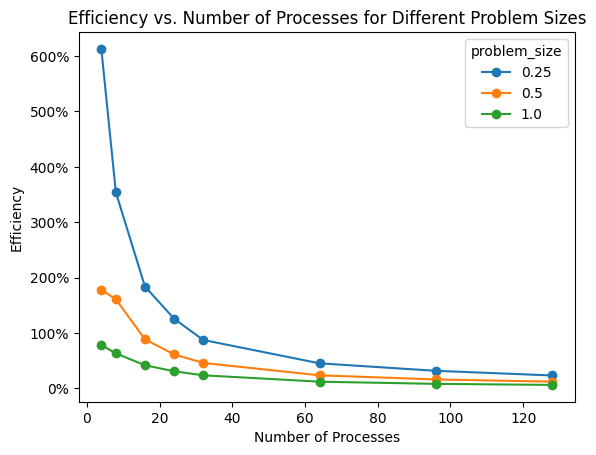

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load the data from the CSV file
data = pd.read_csv('/Users/francescolaiti/Downloads/performance_benchmarks.csv')

# Calculate the serial time for each problem size
serial_times = 44.0

# Group the data by problem size and number of processes
grouped_data = data.groupby(['problem_size', 'processes'])

# Take the minimum time for each configuration
min_times = grouped_data['time'].min()

# Calculate the speedup for each configuration
speedup = serial_times / min_times

# Calculate the efficiency for each configuration
efficiency = speedup / grouped_data['processes'].first()
print(efficiency)

# Reshape the data for plotting
plot_data = efficiency.unstack(level=0)

# Plot the data
plot_data.plot.line(marker='o')

# Set the y-axis formatter to format tick labels as percentages
yticks = mtick.PercentFormatter(xmax=1.0, decimals=0)
plt.gca().yaxis.set_major_formatter(yticks)

# Add axis labels and a title
plt.xlabel('Number of Processes')
plt.ylabel('Efficiency')
plt.title('Efficiency vs. Number of Processes for Different Problem Sizes')

# Show the plot
plt.show()


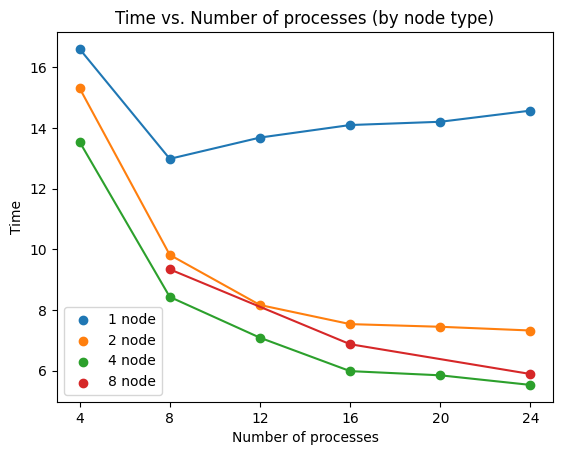

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file, ignoring the "place" column
df = pd.read_csv('/Users/francescolaiti/Downloads/MPI_performance_benchmarks.csv', usecols=['nodes', 'cores', 'processes', 'time'])

# Group the data by both nodes and processes, and calculate the minimum time for each group
grouped = df.groupby(['nodes', 'processes']).min()

# Create a scatter plot and line plot for each node type
for node_type in grouped.index.levels[0]:
    node_group = grouped.loc[node_type]
    plt.scatter(node_group.index, node_group['time'], label=f'{node_type} node')

    # Add a line connecting the data points for each node type
    plt.plot(node_group.index, node_group['time'], label=None)

# Set the axis labels and title
plt.xlabel('Number of processes')
plt.ylabel('Time')
plt.title('Time vs. Number of processes (by node type)')

# Set the x-tick locations and labels
plt.xticks(grouped.index.levels[1], grouped.index.levels[1])

# Add a legend
plt.legend()

# Show the plot
plt.show()


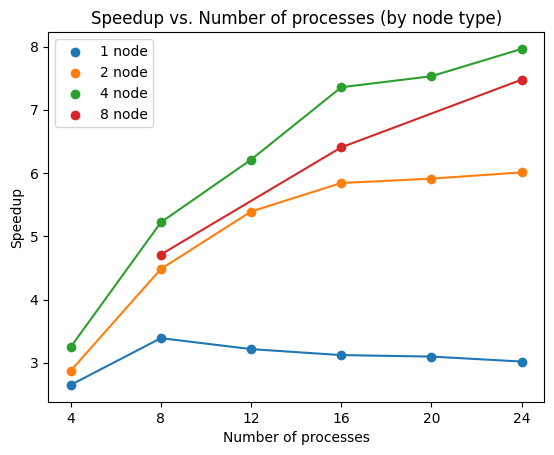

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

#csv_serial = pd.read_csv("/home/francesco.laiti/HPC_Project/serial/output/performance_benchmarks.csv", header=0)

# Load the data from the CSV file, ignoring the "place" column
df = pd.read_csv('/Users/francescolaiti/Downloads/MPI_performance_benchmarks.csv', usecols=['nodes', 'cores', 'processes', 'time'])

# Group the data by both nodes and processes, and calculate the minimum time for each group
grouped = df.groupby(['nodes', 'processes']).min()

# Calculate the speedup for each data point
serial_time = 44.0
grouped['speedup'] = serial_time / grouped['time']

# Create a scatter plot and line plot for each node type
for node_type in grouped.index.levels[0]:
    node_group = grouped.loc[node_type]
    plt.scatter(node_group.index, node_group['speedup'], label=f'{node_type} node')

    # Add a line connecting the data points for each node type
    plt.plot(node_group.index, node_group['speedup'], label=None)

# Set the axis labels and title
plt.xlabel('Number of processes')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of processes (by node type)')

# Set the x-tick locations and labels
plt.xticks(grouped.index.levels[1], grouped.index.levels[1])

# Add a legend
plt.legend()

# Show the plot
plt.show()


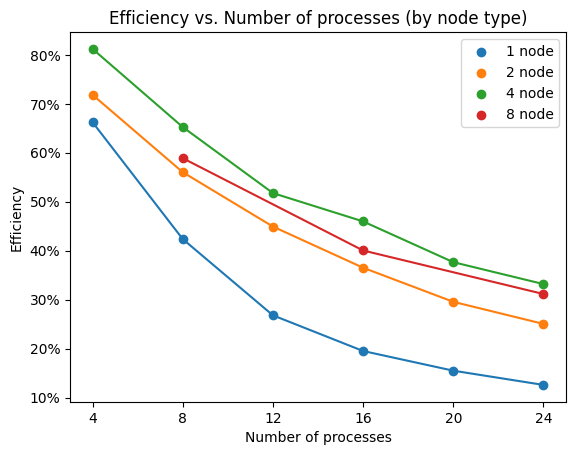

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

# Load the data from the CSV file, ignoring the "place" column
df = pd.read_csv('/Users/francescolaiti/Downloads/MPI_performance_benchmarks.csv', usecols=['nodes', 'cores', 'processes', 'time'])

# Group the data by both nodes and processes, and calculate the minimum time for each group
grouped = df.groupby(['nodes', 'processes']).min()

# Calculate the speedup and efficiency for each data point
serial_time = 44.0  # replace with the actual serial time
grouped['speedup'] = serial_time / grouped['time']
grouped['efficiency'] = grouped['speedup'] / grouped.index.get_level_values('processes')

# Create a scatter plot and line plot for each node type
for node_type in grouped.index.levels[0]:
    node_group = grouped.loc[node_type]
    plt.scatter(node_group.index, node_group['efficiency'], label=f'{node_type} node')

    # Add a line connecting the data points for each node type
    plt.plot(node_group.index, node_group['efficiency'], label=None)

# Set the axis labels and title
plt.xlabel('Number of processes')
plt.ylabel('Efficiency')
plt.title('Efficiency vs. Number of processes (by node type)')

# Set the x-tick locations and labels
plt.xticks(grouped.index.levels[1], grouped.index.levels[1])

# Set the y-axis formatter to format tick labels as percentages
yticks = mtick.PercentFormatter(xmax=1.0, decimals=0)
plt.gca().yaxis.set_major_formatter(yticks)

# Add a legend
plt.legend()

# Show the plot
plt.show()